# Stoke Prediction Dataset 

Data source: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset <br>
Data updated date: 2021-01-26

In [1]:
# import libraries needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# make notebook full width for better viewing

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## 1.1 Loading the dataset

In [3]:
df = pd.read_csv(r'data/healthcare-dataset-stroke-data.csv')

In [4]:
# read the first 5 lines of data

df.head().T

,0,1,2,3,4
id,9046,51676,31112,60182,1665
gender,Male,Female,Male,Female,Female
age,67.0,61.0,80.0,49.0,79.0
hypertension,0,0,0,0,1
heart_disease,1,0,1,0,0
ever_married,Yes,Yes,Yes,Yes,Yes
work_type,Private,Self-employed,Private,Private,Self-employed
Residence_type,Urban,Rural,Rural,Urban,Rural
avg_glucose_level,228.69,202.21,105.92,171.23,174.12
bmi,36.6,NaN,32.5,34.4,24.0


## 1.2 Understanding the dataset

In [5]:
print('Number of rows: ', df.shape[0], '\nNumber of columns: ', df.shape[1])
print('Number of \'id\' in this data:', df.id.nunique())

# row count is the same as unique id count, so setting id as index
df = df.set_index('id')

Number of rows:  5110 
Number of columns:  12
Number of 'id' in this data: 5110


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [7]:
# Understanding each columns how many unique count of data is contained

for i in df.columns:
    unique_cnt = df[i].nunique()
    print('-----------------------------------------')
    print('Column Name: ',i,'\n-----------------------------------------\nUnique Count of Input:', unique_cnt)
    if unique_cnt < 6:
        print(df[i].value_counts())
    print('\n')

-----------------------------------------
Column Name:  gender 
-----------------------------------------
Unique Count of Input: 3
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


-----------------------------------------
Column Name:  age 
-----------------------------------------
Unique Count of Input: 104


-----------------------------------------
Column Name:  hypertension 
-----------------------------------------
Unique Count of Input: 2
0    4612
1     498
Name: hypertension, dtype: int64


-----------------------------------------
Column Name:  heart_disease 
-----------------------------------------
Unique Count of Input: 2
0    4834
1     276
Name: heart_disease, dtype: int64


-----------------------------------------
Column Name:  ever_married 
-----------------------------------------
Unique Count of Input: 2
Yes    3353
No     1757
Name: ever_married, dtype: int64


-----------------------------------------
Column Name:  work_type 
--------------

## 1.3 Data definition:

Number of rows:  5110 <br>
Number of columns:  11 <br><br>
There are 10 features in this datasets:

| Feature | Data type | Other descriptions | Processing Needed? | Missing Value? | Encoding Needed? |
| ------- | --------- | ------------------ | ----------------- | --------------- | ---------------- |
gender | categorical | Female, Male, Other | T | T (Other) | T |
age | float64 | | F | F | F |
hypertension | boolean | 0, 1 | T | F | F |
heart_disease | boolean | 0, 1| T | F | F |
ever_married | boolean | Yes, No | T | F | F |
work_type | categorical | Private, Self-employed, children, Govt_job, Never_worked | T | F | T |
residence_type | categorical | Rural, Urban | T | F | T |
avg_glucose_level | float64 | | F | F | F |
bmi | float64 | | F | T | F |
smoking_status | categorical | never smoked, Unknown, formerly smoked, smokes | T | F | T |
stroke | boolean | 0, 1 | T | F | F |

## 1.4 Data cleaning
#### 1.4.1 Renaming columns

In [8]:
# renaming columns to lower-case 'R' in Residence_type

df.columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']

#### 1.4.2 Cleaning by feature

Check for: <br>
1. data type
2. data range: extrerme numbers
2. missing values

#### Gender

In [28]:
# data type
df.gender.dtype

dtype('O')

In [30]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [112]:
# lower the categorical names
df['gender'] = df['gender'].str.lower()

In [113]:
# find out what that one row of other is

df[df['gender'] == 'other'] # can't tell what gender this data point is, not sure how it'll impact the model later on, keep for now

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
56156,other,26.0,0,0,0,Private,Rural,143.33,22.4,formerly smoked,0


#### Age

In [31]:
# data type
df.age.dtype

dtype('float64')

In [13]:
# age data range
df['age'].describe() # min age is not an integer, age column can be float64

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [37]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x,y

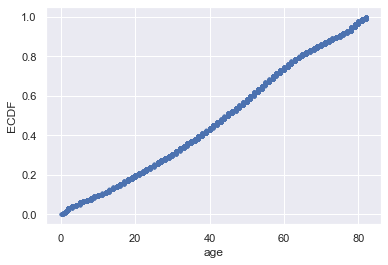

In [40]:
x,y = ecdf(df['age'])
_ = plt.plot(x,y,linestyle='none', marker='.')
_ = plt.xlabel('age')
_ = plt.ylabel('ECDF')

# RANGE: look pretty well-distributed

In [42]:
df[df['age'].isna() == True] 
# MISSING VALUES: none

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,


#### hypertension

In [46]:
# DATA TYPE
df.hypertension.dtype

dtype('int64')

In [54]:
# DATA RANG & MISSING VALUES
df['hypertension'].value_counts() #no missing values

0    4612
1     498
Name: hypertension, dtype: int64

According to cdc, 45% of adults have hypertension, 24% of adults with hypertension have their conditions under control (~10.8% of the adult population)

Source: https://www.cdc.gov/bloodpressure/facts.htm#:~:text=Nearly%20half%20of%20adults%20in,are%20taking%20medication%20for%20hypertension.&text=Only%20about%201%20in%204,have%20their%20condition%20under%20control.

In [55]:
df_ht = df[df['age'] >= 18]['hypertension'].value_counts().to_frame()
df_ht['percentage'] = df_ht['hypertension']/df_ht['hypertension'].sum()
df_ht

,hypertension,percentage
0,3757,0.883169
1,497,0.116831


Surprisingly, it matches up pretty well with cdc. No major red flag here.

#### heart_disease

In [48]:
# DATA TYPE
df.heart_disease.dtype

dtype('int64')

In [56]:
# DATA RANGE & MISSING VALUES

df.heart_disease.value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

According to NCBI, about 7% of Americans aged 20+ have Cardiovascular disease.
8.3% are men, 6.1% are female.

Source: https://www.ncbi.nlm.nih.gov/books/NBK83160/#:~:text=of%20Cardiovascular%20Disease-,Coronary%20Heart%20Disease,for%20women%20is%206.1%20percent.

In [60]:
df_hd = df[df['age'] >= 20]['heart_disease'].value_counts().to_frame()
df_hd['percentage'] = df_hd['heart_disease']/df_hd['heart_disease'].sum()
df_hd

,heart_disease,percentage
0,3869,0.933639
1,275,0.066361


In [61]:
df_hd = df[df['age'] >= 20].groupby('gender').agg({'heart_disease':'sum'})
df_hd['percentage'] = df_hd['heart_disease']/df_hd['heart_disease'].sum()
df_hd

,heart_disease,percentage
gender,,
Female,113,0.410909
Male,162,0.589091
Other,0,0.000000


Again, it follows similar trend with NCBI. with 6.6% of heart disease on sample aged 20+. and more male with heart disease than female.

#### ever_married

In [62]:
# DATA TYPE
df.ever_married.dtypes

dtype('int32')

In [63]:
# ever_married
# change to boolean with 1,0

df['ever_married'] = np.where(df['ever_married'] == 'Yes', 1,0)
df['ever_married'].value_counts()

1    3353
0    1757
Name: ever_married, dtype: int64

In [68]:
print(str(round(df[df['ever_married'] == 1].shape[0] / df[df['age'] >= 15].shape[0] *100, 2)), '% of people married')

76.01 % of people married


According to an article in USA today in 2019, about 48.2% pf Americans age 15 and over are married.

Our dataset has more married people than national average.

Source: https://www.usatoday.com/story/money/2019/03/07/marriage-us-states-highest-percentage-married-people/39043233/#:~:text=Nationwide%2C%20nearly%20half%20(48.2%20percent,have%20not%20remarried%20or%20separated.&text=In%20some%20states%2C%20a%20higher,and%20older%20residents%20are%20married.

#### work_type

In [115]:
df.work_type.dtype

dtype('O')

In [117]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [118]:
# lower the categorical names
df['work_type'] = df['work_type'].str.lower()

#### residence_type

In [119]:
df.residence_type.dtype

dtype('O')

In [120]:
df.residence_type.value_counts()

Urban    2596
Rural    2514
Name: residence_type, dtype: int64

In [121]:
# lower the categorical names
df['residence_type'] = df['residence_type'].str.lower()

#### avg_glucose_level

In [70]:
# DATA TYPE
df.avg_glucose_level.dtype # float64 is good dtype

dtype('float64')

In [16]:
# data range
df.avg_glucose_level.describe() 

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

A blood sugar level less than 140 mg/dL (7.8 mmol/L) is normal... A reading between 140 and 199 mg/dL (7.8 mmol/L and 11.0 mmol/L) indicates prediabetes.

Source: https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451#:~:text=A%20blood%20sugar%20level%20less,mmol%2FL)%20indicates%20prediabetes.

In [80]:
def glucose(num):
    if num < 54:
        return 'Hypoglycemic'
    elif num < 70:
        return 'Low'
    elif num < 140:
        return 'Healthy'
    elif num < 199:
        return 'Prediabetic'
    else:
        return 'Diabetic'

df_plot = df[['avg_glucose_level']]
df_plot['diabetic'] = df_plot['avg_glucose_level'].apply(glucose)

C:\Users\cchan\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [81]:
df_plot['diabetic'].value_counts()

Healthy        3535
Low             754
Diabetic        445
Prediabetic     376
Name: diabetic, dtype: int64

In [85]:
## Missing Values

df[['avg_glucose_level']].info() # no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_glucose_level  5110 non-null   float64
dtypes: float64(1)
memory usage: 79.8 KB


#### BMI

In [87]:
# DATA TYPE
df.bmi.dtype

dtype('float64')

In [17]:
# bmi
df.bmi.describe() # float64 is good dtype

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [89]:
def bmi_calc(num):
    if num < 18.5:
        return 'Underweight'
    elif num < 24.9:
        return 'Healthy'
    elif num < 29.9:
        return 'Overweight'
    elif num < 30:
        return 'Obese'

df_plot = df[['bmi']]
df_plot['bmi_category'] = df_plot['bmi'].apply(bmi_calc)

C:\Users\cchan\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [92]:
df_plot['bmi_category'].value_counts()

Overweight     1410
Healthy        1216
Underweight     337
Obese            26
Name: bmi_category, dtype: int64

In [96]:
print(round(df_plot[(df_plot['bmi_category'] == 'Overweight') | (df_plot['bmi_category'] == 'Obese')].shape[0]/ df_plot.shape[0] *100, 2),'%')

28.1 %


In [98]:
# MISSING DATA
df[df['bmi'].isna() == True].shape[0]

201

According to NIH, 2/3 adults were considered to be overweight or have obesity, this 28.1% is too low.
Plus, There are 201 missing data points.
Empty values will be replaced with average

Source" https://www.niddk.nih.gov/health-information/health-statistics/overweight-obesity

In [100]:
bmi_mean = np.mean(df['bmi'])

In [101]:
df['bmi'] = df['bmi'].replace(np.nan, bmi_mean)

#### smoking status

In [102]:
# DTYPE
df.smoking_status.dtype

dtype('O')

In [103]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [104]:
df['smoking_status'] = df['smoking_status'].replace('Unknown', 'unknown')

In [105]:
# MISSING VALUES

df[['smoking_status']].info()

## only those 'unknown' values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   smoking_status  5110 non-null   object
dtypes: object(1)
memory usage: 79.8+ KB


In [107]:
df_ss = df[df['smoking_status'] != 'unknown'].reset_index().groupby('smoking_status').agg({'id':'count'})
df_ss['percentage'] = df_ss['id']/df_ss['id'].sum()
df_ss

,id,percentage
smoking_status,,
formerly smoked,885,0.248177
never smoked,1892,0.530566
smokes,789,0.221256


According to Statista, about 19% of adults smoke tabacco. Which is similar to the sample here.

The group of people who are unknown (n=1544), if our model isn't that good, we'll create a classifier to predict missing values, but leave it for now.

Source: https://www.statista.com/topics/1600/smoking/#:~:text=Currently%2C%20around%2019%20percent%20of,to%2021%20percent%20in%202015.

# Final Data Metadescription

| Feature | Data type | Other descriptions | Processing Needed? | Missing Value? | Encoding Needed? |
| ------- | --------- | ------------------ | ----------------- | --------------- | ---------------- |
gender | categorical | Female, Male, Other | T | T (Other) | T |
age | float64 | | F | F | F |
hypertension | int | 0, 1 | T | F | F |
heart_disease | int | 0, 1| T | F | F |
ever_married | int | 0, 1 | T | F | F |
work_type | categorical | Private, Self-employed, children, Govt_job, Never_worked | T | F | T |
residence_type | categorical | Rural, Urban | T | F | T |
avg_glucose_level | float64 | | F | F | F |
bmi | float64 | | F | T | F |
smoking_status | categorical | never smoked, unknown, formerly smoked, smokes | T | F | T |
stroke | boolean | 0, 1 | T | F | F |